### Dataset & EDA

In [2]:
from google.colab import files
files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
!ls /content

Fake.csv  sample_data  True.csv


In [8]:
!unzip fake-and-real-news-dataset.zip

unzip:  cannot find or open fake-and-real-news-dataset.zip, fake-and-real-news-dataset.zip.zip or fake-and-real-news-dataset.zip.ZIP.


In [225]:
import pandas as pd

In [226]:
true = pd.read_csv('/content/True.csv')

In [228]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [229]:
fake = pd.read_csv('/content/Fake.csv')

In [230]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [231]:
true.shape

(21417, 4)

In [232]:
fake.shape

(23481, 4)

In [233]:
true['label'] = 1

In [234]:
true.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [235]:
fake['label'] = 0

In [236]:
fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [237]:
frames = [true.loc[0:5000][:], fake.loc[0:5000][:]]
df = pd.concat(frames)

In [238]:
df.shape

(10002, 5)

In [239]:
df = df.sample(frac=1).reset_index(drop=True)

In [240]:
df.head()

,title,text,subject,date,label
0,Fox Host Gives Trump The Most PATHETICALLY De...,Donald Trump s first debate against his Democr...,News,"October 7, 2016",0
1,Republican Senator Hatch rejects bipartisan he...,WASHINGTON (Reuters) - U.S. Senate Finance Com...,politicsNews,"October 18, 2017",1
2,Trump Has Extremely Inappropriate Reaction To...,The majority of America has already noticed ...,News,"May 8, 2017",0
3,House Democrats press Trump to release tax ret...,WASHINGTON (Reuters) - Democrats in the U.S. H...,politicsNews,"April 5, 2017",1
4,Judge orders Illinois to boost Medicaid bill p...,CHICAGO (Reuters) - A U.S. judge on Friday dea...,politicsNews,"June 30, 2017",1


In [241]:
X = df.drop('label', axis=1)

In [242]:
y = df['label']

In [243]:
df = df.dropna()

In [244]:
messages = df.copy()

In [245]:
messages.reset_index(inplace=True)

In [246]:
messages.head()

,index,title,text,subject,date,label
0,0,Fox Host Gives Trump The Most PATHETICALLY De...,Donald Trump s first debate against his Democr...,News,"October 7, 2016",0
1,1,Republican Senator Hatch rejects bipartisan he...,WASHINGTON (Reuters) - U.S. Senate Finance Com...,politicsNews,"October 18, 2017",1
2,2,Trump Has Extremely Inappropriate Reaction To...,The majority of America has already noticed ...,News,"May 8, 2017",0
3,3,House Democrats press Trump to release tax ret...,WASHINGTON (Reuters) - Democrats in the U.S. H...,politicsNews,"April 5, 2017",1
4,4,Judge orders Illinois to boost Medicaid bill p...,CHICAGO (Reuters) - A U.S. judge on Friday dea...,politicsNews,"June 30, 2017",1


In [247]:
messages['title'][2]

' Trump Has Extremely Inappropriate Reaction To Being Contradicted By His Own National Security Adviser'

In [248]:
messages['text'][2]

'The majority of America has already noticed   and figured it out a long time ago   that Donald Trump doesn t have a measured, steady reaction to anything. Widely known for his lack of mental and emotional stability, America s new failing president continues to horrify the nation (and the world) with his over-the-top, inappropriate reactions to even the most straightforward issues and disagreements. How Trump treats members of his own team is a perfect example of this.Last month, Trump made a controversial remark when he insisted that South Korea should pay for the Terminal High Altitude Area Defense (THAAD), a missile defense system that would help keep North Korea at bay. As Trump frequently talks out of his a** and makes statements that have no basis in reality, he was quickly contradicted by his own National Security Adviser, H.R. McMaster. In a public statement, McMaster stepped in and quickly assured the Korean government that the cost of THAAD would be taken care of by the Unite

### Preprocessing

In [249]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [250]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [251]:
len(corpus)

10002

In [252]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [253]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [254]:
X_train_tfidf = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [255]:
from gensim.models import Word2Vec


In [256]:
sentences = [review.split() for review in corpus]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)


In [257]:
import numpy as np

In [258]:
# Generate document embeddings using Word2Vec
def document_embedding(review, model):
    words = review.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

embeddings = [document_embedding(text, word2vec_model) for text in corpus]


In [259]:
# Combine TF-IDF features with Word2Vec embeddings
X = np.hstack((X_train_tfidf, np.array(embeddings)))


In [260]:
y = messages['label']

In [261]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [262]:
count_df = pd.DataFrame(X_train_tfidf, columns=tfidf_v.get_feature_names_out())
count_df.head(3)

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.062036,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Passive Aggressive Classifier**

In [263]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier1 = PassiveAggressiveClassifier(max_iter=5000)

In [264]:
from sklearn import metrics
import numpy as np
import itertools

classifier1.fit(X_train, y_train)

pred1 = classifier1.predict(X_test)

score = metrics.accuracy_score(y_test, pred1)
print("accuracy:   %0.3f" % score)

accuracy:   0.997


In [265]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


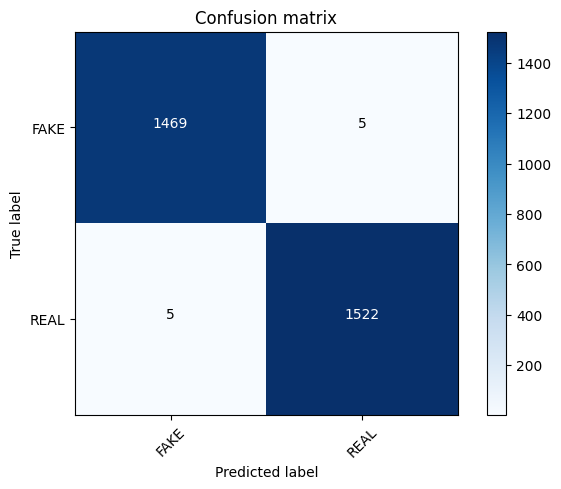

In [266]:
cm = metrics.confusion_matrix(y_test, pred1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [267]:
classifier1.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1])

### Preprocess and transform datapoint text (true['text'][16888]) and try to predict it based on the model

In [268]:
review = re.sub('[^a-zA-Z]', ' ', true['text'][16888])
review = review.lower()
review = review.split()

review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'cairo reuter three polic offic kill eight other injur shoot raid suspect milit hideout giza southwest egyptian capit two secur sourc said friday sourc said author follow lead apart thought hous eight suspect member hasm group claim sever attack around capit target judg policemen sinc last year suspect milit fled exchang fire sourc said egypt accus hasm milit wing muslim brotherhood islamist group outlaw muslim brotherhood deni islamist insurg sinai peninsula grown sinc militari overthrew presid moham mursi muslim brotherhood mid follow mass protest rule milit group stage insurg pledg allegi islam state blame kill hundr soldier policemen start target area includ egypt christian copt'

In [269]:
val1 = tfidf_v.transform([review]).toarray()

In [270]:
pd.DataFrame(val1, columns=tfidf_v.get_feature_names_out())

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
embedding1 = document_embedding(review, word2vec_model)  # Generate embedding for new review
val1 = np.hstack((val1, embedding1.reshape(1, -1)))  # Combine TF-IDF and embedding

In [273]:
prediction1 = classifier1.predict(val1)
print("Predicted Label:", prediction1)

Predicted Label: [1]


### **Naive Bayes Classifier**

In [274]:
# Import Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Replace PassiveAggressiveClassifier with MultinomialNB
classifier2 = MultinomialNB()

In [275]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the classifier on scaled data
classifier2.fit(X_train_scaled, y_train)

# Predict using the trained classifier on scaled test data
pred2 = classifier2.predict(X_test_scaled)


In [276]:
# Calculate accuracy
score = metrics.accuracy_score(y_test, pred2)
print("accuracy:   %0.3f" % score)

accuracy:   0.991


Confusion matrix, without normalization


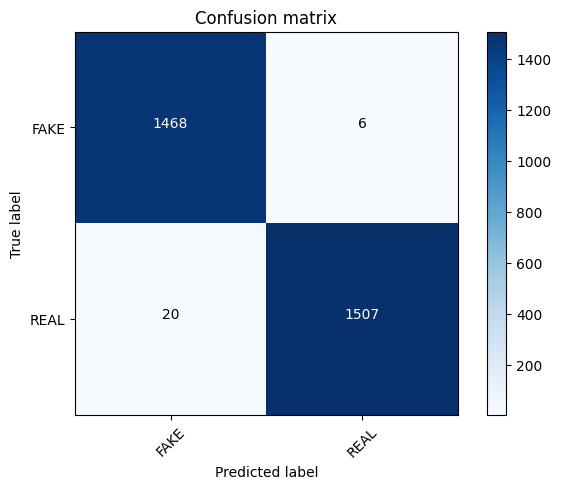

In [277]:
# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, pred2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Preprocess and transform datapoint text (fake['text'][1688]) and try to predict it based on the model



In [278]:
# Example of predicting a single review
review = re.sub('[^a-zA-Z]', ' ', fake['text'][1688])
review = review.lower()
review = review.split()

review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)

In [279]:
# Transform the review using TF-IDF vectorizer
val2 = tfidf_v.transform([review]).toarray()

In [280]:
embedding2 = document_embedding(review, word2vec_model)  # Generate embedding for new review
val2 = np.hstack((val2, embedding2.reshape(1, -1)))  # Combine TF-IDF and embedding

In [281]:
# Predict using the classifier
prediction2 = classifier2.predict(val2)
print("Predicted Label:", prediction2)


Predicted Label: [0]


### **MultiLayer Perceptron Classifier**

In [282]:
from sklearn.neural_network import MLPClassifier

# Replace PassiveAggressiveClassifier with MLPClassifier
classifier3 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)

In [283]:
# Fit the classifier
classifier3.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [284]:
# Predict using the trained classifier
pred3 = classifier3.predict(X_test)

In [285]:
# Calculate accuracy
score = metrics.accuracy_score(y_test, pred3)
print("accuracy:   %0.3f" % score)

accuracy:   0.996


Confusion matrix, without normalization


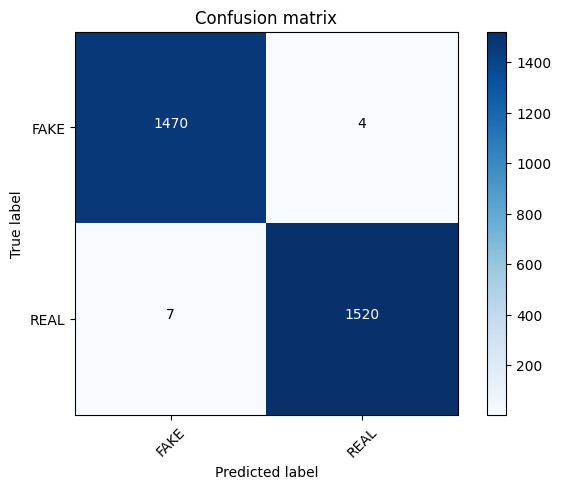

In [286]:
# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, pred3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Preprocess and transform datapoint text (fake['text'][1689]) and try to predict it based on the model

In [287]:
# Example of predicting a single review
review = re.sub('[^a-zA-Z]', ' ', fake['text'][1689])
review = review.lower()
review = review.split()

review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)

In [288]:
# Transform the review using TF-IDF vectorizer
val3 = tfidf_v.transform([review]).toarray()

In [289]:
embedding3 = document_embedding(review, word2vec_model)  # Generate embedding for new review
val3 = np.hstack((val3, embedding3.reshape(1, -1)))  # Combine TF-IDF and embedding

In [290]:
# Predict using the classifier
prediction3 = classifier3.predict(val3)
print("Predicted Label:", prediction3)

Predicted Label: [0]
